Изображении решающей поверхности для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


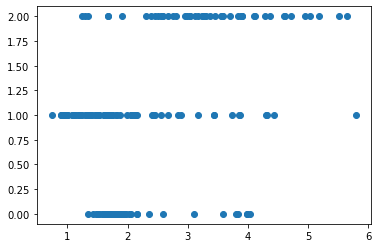

In [72]:
plt.scatter(X['malic_acid'], data['target'])

In [73]:
idx = X.index[(X['malic_acid']>5)&(y==1)]

In [74]:
X, y = X.drop(idx), np.delete(y, idx)

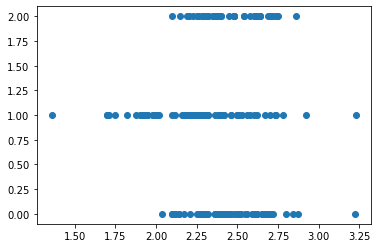

In [75]:
plt.scatter(X['ash'], y)

In [76]:
idx = X.query('ash>3|ash<1.5').index

In [77]:
X, y =X.drop(idx), np.delete(y, idx)

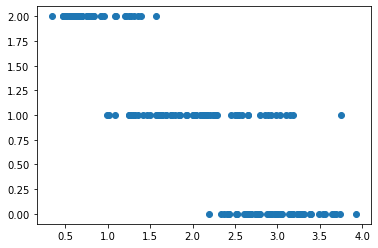

In [78]:
plt.scatter(X['flavanoids'], y)

In [79]:
X, y =X.drop(X.query('flavanoids>3.7').index), np.delete(y, X.query('flavanoids>3.7').index)

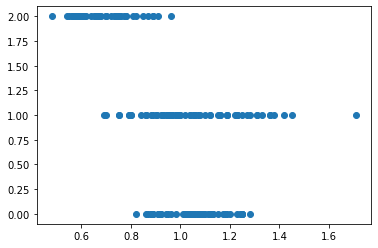

In [80]:
plt.scatter(X['hue'], y)

In [81]:
X, y =X.drop(X.query('hue>1.6').index), np.delete(y, X.query('hue>1.6').index)

In [82]:
#пропущенных значений нет
X.isna().sum().sum()

0

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       170 non-null    float64
 1   malic_acid                    170 non-null    float64
 2   ash                           170 non-null    float64
 3   alcalinity_of_ash             170 non-null    float64
 4   magnesium                     170 non-null    float64
 5   total_phenols                 170 non-null    float64
 6   flavanoids                    170 non-null    float64
 7   nonflavanoid_phenols          170 non-null    float64
 8   proanthocyanins               170 non-null    float64
 9   color_intensity               170 non-null    float64
 10  hue                           170 non-null    float64
 11  od280/od315_of_diluted_wines  170 non-null    float64
 12  proline                       170 non-null    float64
dtypes: fl

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = np.random.seed(1))

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[['alcohol', 'magnesium']])

X_train_sc =scaler.transform(X_train[['alcohol', 'magnesium']])
X_test_sc=scaler.transform(X_test[['alcohol', 'magnesium']])

In [86]:
from sklearn.neighbors import KNeighborsClassifier
sp_clf = []
for k in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_sc, y_train)
    sp_clf.append(clf)
    y_predicted = clf.predict(X_test_sc)
    print(f"k = {k}; accuracy = {np.mean(y_predicted==y_test):.3f}")

k = 1; accuracy = 0.706
k = 3; accuracy = 0.706
k = 5; accuracy = 0.686
k = 10; accuracy = 0.765
k = 15; accuracy = 0.725
k = 25; accuracy = 0.725


In [87]:
for k in [1, 3, 5, 10, 15, 25]:
    y_predicted = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_sc, y_train).predict(X_train_sc)
    print(f"k = {k}; accuracy = {np.mean(y_predicted==y_train):.3f}")

k = 1; accuracy = 1.000
k = 3; accuracy = 0.790
k = 5; accuracy = 0.756
k = 10; accuracy = 0.714
k = 15; accuracy = 0.723
k = 25; accuracy = 0.714


In [19]:
# !pip install mlxtend

In [20]:
import mlxtend

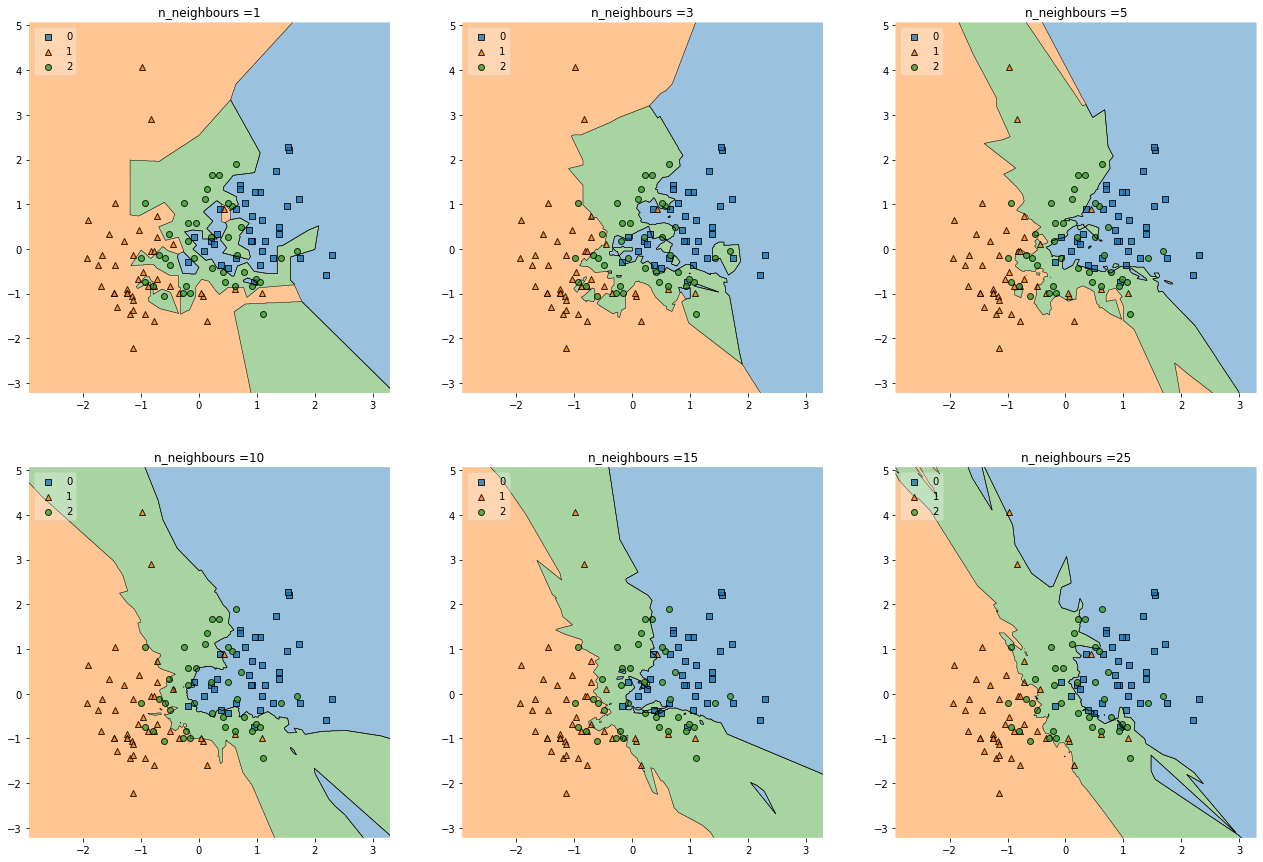

In [56]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(22,15))

labels = labels =  [f"n_neighbours ={t}" for t in [1, 3, 5, 10, 15, 25]]
for clf, lab, grd in zip(sp_clf, labels,itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_sc, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

Судя по заданию 1.3. наибольшую точность классификации можно видеть при k=10, как на трэйне, так и на тесте (поскольку на обучающей выборке k=1, всегда будет 1, ввиду особенностей алгоритма, так как для k =1 он всегда находит 1-го ближайшего соседа, а именно – сам объект). k = 10; accuracy = 0.765 – наилучший результат, но надо помнить, что мы не пробовали такие значения как 2,4,6.... + все зависит от рандом state6 хотя сейчас мы зафиксировали seed, но все равно, если менять его, то и меняются оптимальные k. При этом значение на тестовой выборке лучше значения на тренировочной.

Так как наилучшее значение на трейне после k=1, k=2, что не совпадает с наилучшем значением на тесте, но в задании все равно просят рассмотреть трейн, а не тест. То поверхность k = 1 идеально подстроена  под выборку, с увеличением k, можно видеть что зеленая поверхность необоснованно расширяется и начинает становить полоской, при этом при к = 15, она максимально, при к =20 сужается замещаясь синей поверхностью. При увеличении k перестают существовать анклавы разных цветов и поверхности сглаживаются. Я бы остановилась на k=3, так как превращение зеленой поверхности в полосу необоснованно, классификатор может ошибочно определять классы из-за стольк широкой поверхности. Возможно все же там присутсвуют некоторые выбросы6 но учитывая небольшой объем данных маловероятно встретить 2 выброса в одном месте.

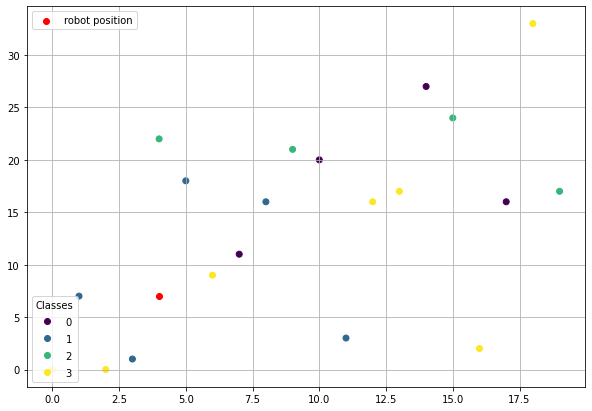

In [3]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

 Реализизация класса, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position.reshape(1,-1)
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks,classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        # identifying direction with given probabilities
        direction = np.random.binomial(1, 0.8) * self.knn.predict([self.trajectory[-1]])
        self.trajectory = np.vstack((self.trajectory, [self.trajectory[-1]+self.mapping[direction[0]]]))
        

In [55]:
# landmarks = np.array([[0,0], [1,7], [2,0], [3,1], [4,22]
#                       , [5,18], [6,9], [7,11], [8,16], [9,21], [10,20], [11,3], [12,16], 
#                       [13,17], [14,27], [15,24], [16,2], [17, 16], [18, 33], [19,17]])

In [56]:
# initial = np.array([10,2])

In [57]:
# k =MobileRobot(1, initial, landmarks, random_classes)
# k.move()
# k.move()
# print(k.trajectory)

In [58]:
#  KNeighborsClassifier(n_neighbors=2, metric='euclidean').fit(landmarks,random_classes).predict(np.array([4,7]).reshape(1,-1))

In [59]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

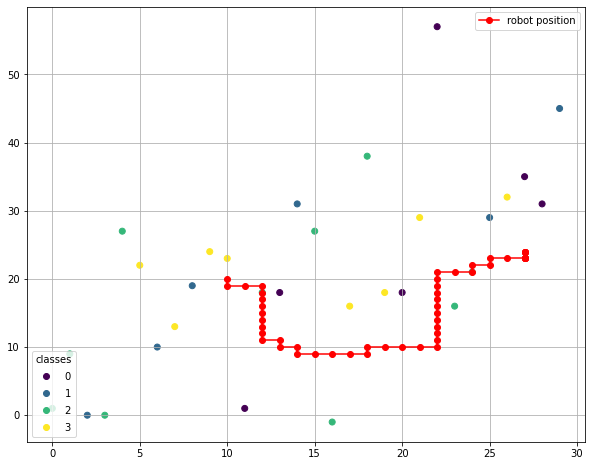

In [60]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

Числом соседей определяется направление движения робота, то есть установив праметр равный количеству всех точек на плоскости, мы всегда двигаемся в направлении вверх / вправо, так как других вариантов просто нет. Так как вверх – самый часто встречающийся класс. если бы метки были расставлены осмысленно, то тогда бы все зависело от начального положения робота, ведь вероятнее всего мы бы наблюдали какие-то кластеры, и тогда если начальная точка находилась бы внутри кластера, то направление оставалось константным при соблюдении разумного числа соседей.

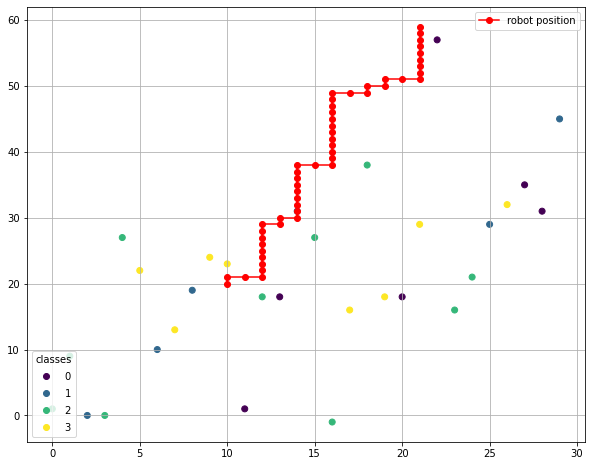

In [61]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

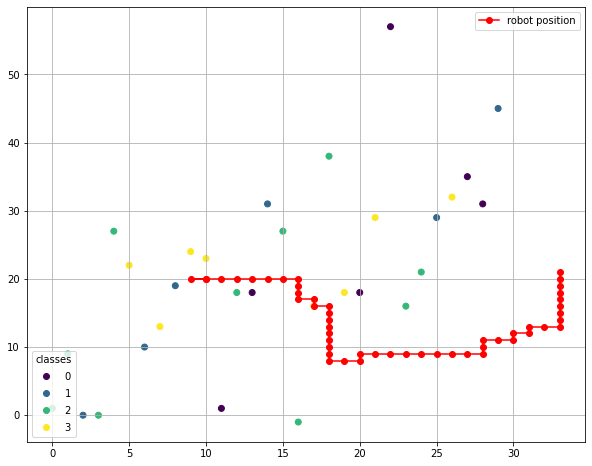

In [62]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

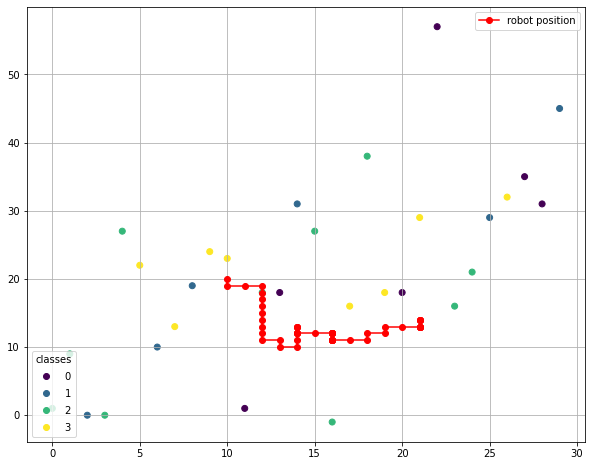

In [63]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

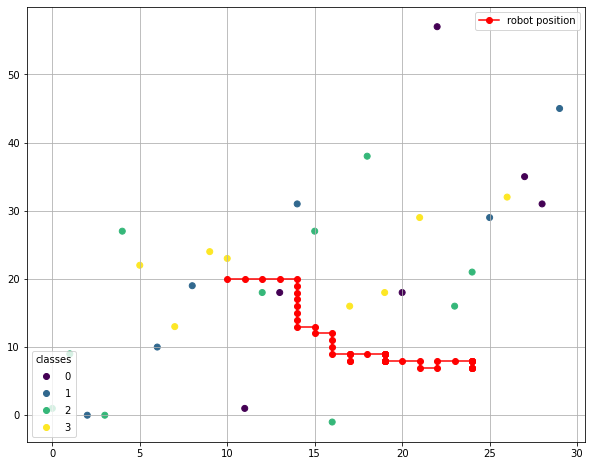

In [64]:
conduct_experiment(x, mean = 3, std = 10, k = 4, n_movements = 50)

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [624]:
import pandas as pd

In [625]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

In [626]:
data.isna().sum().sum()

0

In [627]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [628]:
pd.DataFrame(data.drop(['price'], axis =1).corrwith(data['price']))

,0
carat,0.921591
depth,-0.010647
table,0.127134
x,0.884435
y,0.865421
z,0.861249


In [629]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с целевой переменной коррелируют признаки карат и x,y,z

In [630]:
# select_dtypes(include='number').
data = pd.get_dummies(data, drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [631]:
X_d = data.drop(['price'], axis = 1)
y_d = data['price']

In [632]:
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3, random_state = 10)

In [633]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_d)

X_train_sc_d=scaler.transform(X_train_d)
X_test_sc_d=scaler.transform(X_test_d)

In [634]:
scaler = StandardScaler()
scaler.fit(np.array(y_train_d.values.tolist()).reshape(-1,1))
y_train_sc_d = scaler.transform(np.array(y_train_d.values.tolist()).reshape(-1,1))
y_test_sc_d = scaler.transform(np.array(y_test_d.values.tolist()).reshape(-1,1))

In [635]:
X_test_sc_d

array([[ 0.45541743, -0.03814067, -0.65122157, ..., -0.54398766,
        -0.27109753, -0.32179353],
       [-0.20237428, -0.9509839 ,  0.24907717, ..., -0.54398766,
        -0.27109753, -0.32179353],
       [ 0.71004647, -1.37229616,  0.69922653, ..., -0.54398766,
        -0.27109753, -0.32179353],
       ...,
       [ 2.89561245, -0.52967164, -0.2010722 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [-0.13871701, -0.88076519, -0.2010722 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [ 0.90101826,  0.59382772,  0.24907717, ..., -0.54398766,
        -0.27109753, -0.32179353]])

In [636]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_train = LinearRegression().fit(X_train_sc_d,y_train_sc_d)
print ("Train: {}".format(mean_squared_error(y_train_sc_d, lr_train.predict(X_train_sc_d))))
print ("Test: {}".format(mean_squared_error(y_test_sc_d, lr_test.predict(X_test_sc_d))))

Train: 0.0807288734995549
Test: 0.08217127121697725


In [637]:
X_d.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [638]:
lr_train.coef_

array([[ 1.32907746, -0.01844427, -0.01705106, -0.24193373,  0.02034944,
        -0.06005157,  0.04544907,  0.10640311,  0.08715261,  0.08056027,
        -0.01990847, -0.02584408, -0.04814493, -0.08811503, -0.10896945,
        -0.12957819,  0.24360725,  0.40028242,  0.26048845,  0.41658387,
         0.45616071,  0.32150512,  0.36665254]])

In [639]:
lr_test.coef_

array([[ 1.36479843, -0.02046634, -0.01011687, -0.31628747, -0.00144833,
         0.00146694,  0.0341332 ,  0.09443271,  0.07494895,  0.06721074,
        -0.02139531, -0.02717579, -0.052991  , -0.09165875, -0.11478024,
        -0.1388062 ,  0.24150242,  0.38921649,  0.24939576,  0.40527317,
         0.44458157,  0.31483146,  0.36028318]])

Оценки коэффициентов, которые по модулю на порядок превышают оценки прочих вещественных переменных:

1) carat

2) x

3) clarity_SI1

4) clarity_VS1

5) clarity_VS2

6) clarity_VVS1

7) clarity_VVS2

In [640]:
from sklearn.linear_model import Ridge, Lasso
l = Lasso(10).fit(X_train_d,y_train_d)
l.coef_

array([ 9.53026765e+03, -1.10666956e+02, -5.44881644e+01, -4.22519265e+02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.41184140e+02,
        6.10990032e+01,  7.94188911e+01,  1.13242401e+00, -0.00000000e+00,
       -1.02501578e+02, -5.82961756e+02, -9.59974323e+02, -1.69866947e+03,
        1.29329346e+03,  0.00000000e+00, -8.02868066e+02,  8.23105801e+02,
        5.77363239e+02,  1.16450391e+03,  1.16210964e+03])

In [641]:
from sklearn.linear_model import Ridge, Lasso
l = Lasso(10).fit(X_train_sc_d,y_train_sc_d)
l.coef_

array([ 0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.])

In [642]:
rdg = Ridge(10).fit(X_train_sc_d,y_train_sc_d)
rdg.coef_

array([[ 1.31989192, -0.01784533, -0.01708596, -0.22871636,  0.01813747,
        -0.06240007,  0.0456095 ,  0.10672856,  0.08737562,  0.08093716,
        -0.01980464, -0.02579923, -0.04800375, -0.08789306, -0.10865011,
        -0.12924012,  0.24030716,  0.39227032,  0.25364357,  0.40990178,
         0.44835437,  0.31688353,  0.36126655]])

In [650]:
from numpy import linalg as LA

In [693]:
lasso_ = []
rdg = []
alphas = [0.1, 1.0, 10.0, 100.0, 200.0]
for a in alphas:
    l = Lasso(a).fit(X_train_d, y_train_d)
    lasso_.append(LA.norm(l.coef_))
    r = Ridge(a).fit(X_train_d, y_train_d)
    rdg.append(LA.norm(r.coef_))

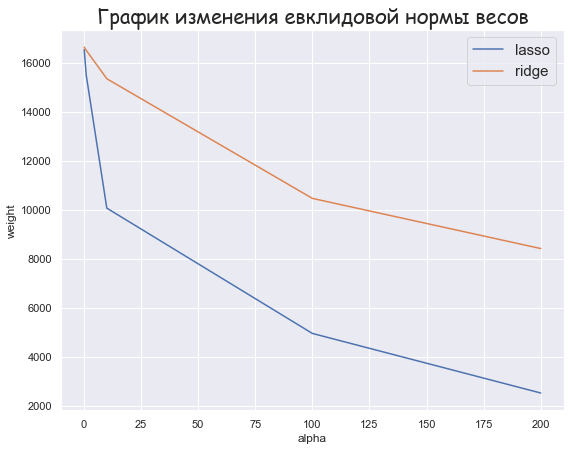

In [694]:
sns.set(rc={'figure.figsize':(9,7)})
plt.plot(alphas, lasso_)
plt.plot(alphas, rdg)
plt.legend(['lasso', 'ridge'], fontsize = 15)
plt.title('График изменения евклидовой нормы весов', fontfamily = 'fantasy',fontstyle = 'oblique',
                fontsize = 20)
plt.xlabel('alpha')
plt.ylabel('weight')
plt.show()

Веса агрессивнее уменьшается через lasso. Lasso регуляризация иногда может приводить к тому, что веса некоторых признаков зануляются, что означант, что их можно вообще не учитывать в модели. То есть Lasso не только уменьшает веса, но и помагает дальнейшему отбору.

In [731]:
from sklearn.linear_model import LassoCV

model = LassoCV(alphas=[0.05, 0.1, 0.15, 0.2, 1, 3, 5, 10], cv = 5)
model.fit(X_train_sc_d, y_train_sc_d)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(alphas=[0.05, 0.1, 0.15, 0.2, 1, 3, 5, 10], cv=5)

In [732]:
model.alphas_[np.argmin(np.mean(model.mse_path_, axis=1))]

0.05

In [733]:
la = Lasso(0.05).fit(X_train_sc_d, y_train_sc_d)
la.coef_

array([ 0.89582306, -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.02814311,  0.        , -0.01322052, -0.06508872,  0.        ,
        0.        ,  0.        ,  0.00717654])

Наиболее информативными оказались такие признаки, как carat, color_I, clarity_IF, clarity_SI1, clarity_VVS1
Остальные оказались неинформативными, так как их коэф. занулилсь. При это мочевидно, что главным признаком является карат, так как вес этого коэффициента почти приближен к 1. И это понятно, так как обычно чем больше карат, тем больше цена, а чистота и прозрачность идут в совокупности с большим каратом.

Значение из предыдущего пункта

Train: 0.0807288734995549

Test: 0.08217127121697725

In [734]:
print ("Test: {}".format(mean_squared_error(y_test_sc_d, la.predict(X_test_sc_d))))

Test: 0.1409054044744608


Судя по качеству на тестовых выборках то лучше использовать обычную модель, не модифицированную lasso, хотя казалось бы это странно, потому что использование параметра регуляризации альфа положение дел должно было улучшиться. Возможно так произошло из-за относительно небольшого объема данных, потому что модель могла штрафовать те веса, которые были оправданно высокими из-за связи между параметрами.